### thinkstats 과제 풀이 및 방향성 제시

thinkstats의 코드를 보면 책의 내용을 반복적으로, 효과적으로 다루기 위해서 함수, 클래스를 만들어서 사용하고 있다. 
근데 이 코드들이 우리가 나중에 사용할 코드, 패키지가 아니어서 이의 근간이 되는
**numpy, pandas, matplotlib 패키지**를 사용할 예정이다.

material 폴더에 올린 tutorial 파일을 보면 기본적인 내용을 학습하는 데에 도움이 될 것이다. 
어쨋든, 어떤 식으로 코드 작성을 따라가야 할 지에 대해서 설명하도록 하겠다.

thinkstats의 내부 코드가 매우 잘 짜여져 있는데 쓸데 없이 너무 복잡하고 문법적인 내용이 너무 많아서 **numpy, pandas, matplotlib**를 이용해서 최대한 간단하게 표현하려고 한다. 답은 코드를 돌렸을 때 나오므로, 포맷은 동일하지 않아도 동일한 결과를 얻으면 된다.

In [10]:
import sys  # 환경 변수 패키지
import numpy as np   # numpy 패키지 (행렬 연산)
import pandas as pd  # pandas 패키지
import matplotlib.pyplot as plt  # plotting 패키지
%matplotlib inline

#matplotlib 환경설정
plt.rcParams['figure.figsize'] = (10.0, 8.0) # plot 크기 설정
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

#code 들어있는 폴더 환경 변수 추가를 위함.
sys.path.append('C:/Users/HS/Desktop/과외/studyroom/materials/ThinkStats2-kr/code')



#### 1번 문제 : 여성 응답자 파일을 읽어들여 변수명을 표시하시오 
→ 데이터를 불러오는 문제이다. 넘어가자

In [11]:
import chap01soln  # chap01soln.py 파일을 불러온다. 
resp = chap01soln.ReadFemResp()  # 파일 내 데이터 불러오는 함수이다
resp.columns  # pandas의 columns 함수

Index(['caseid', 'rscrinf', 'rdormres', 'rostscrn', 'rscreenhisp',
       'rscreenrace', 'age_a', 'age_r', 'cmbirth', 'agescrn',
       ...
       'pubassis_i', 'basewgt', 'adj_mod_basewgt', 'finalwgt', 'secu_r',
       'sest', 'cmintvw', 'cmlstyr', 'screentime', 'intvlngth'],
      dtype='object', length=3087)

In [13]:
resp.shape

(7643, 3087)

#### 2번 문제 : 응답자 가족에 대한 총소득 <tt>totincr</tt> 히스토그램을 생성하시오. 코드를 해석하기 위해서, [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776)을 살펴보시오.
→ 문제를 보고 matplotlib로 구현해보자

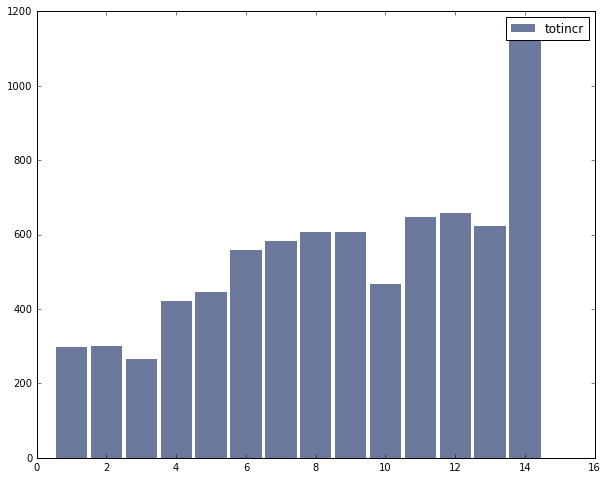

In [68]:
import thinkstats2  # thinkstats2.py 을 불러온다. 
hist = thinkstats2.Hist(resp.totincr)  # thinkstats2 내 Hist 클래스에 resp.totincr 데이터를 넣는다. 

import thinkplot  # thinkplot.py를 불러온다.
thinkplot.Hist(hist, label='totincr')  # thinkplot 내 Hist 함수에 hist를 넣는다. 
thinkplot.Show()  # 그래프를 출력한다. 

**2번 문제 해설** : <br>
1) 먼저 데이터를 본다. 

In [17]:
resp.totincr.min()

1

In [14]:
print("data range : {} to {}".format(resp.totincr.min(), resp.totincr.max())) # 데이터의 min, max 값
print("data shape :",resp.totincr.shape)  # 데이터의 행렬 형태. 

data range : 1 to 14
data shape : (7643,)


2) matplotlib의 histogram 작성법을 본다.

- [matplotlib.pyplot.hist API](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html)
- matplotlib tutorial 자료
![histogram](../pictures/thinkstats/matplot_hist.PNG)


3) 구현해본다. <br>
아래 그래프를 보면 비슷하다. 보다시피 되게 짧고 간결하다.

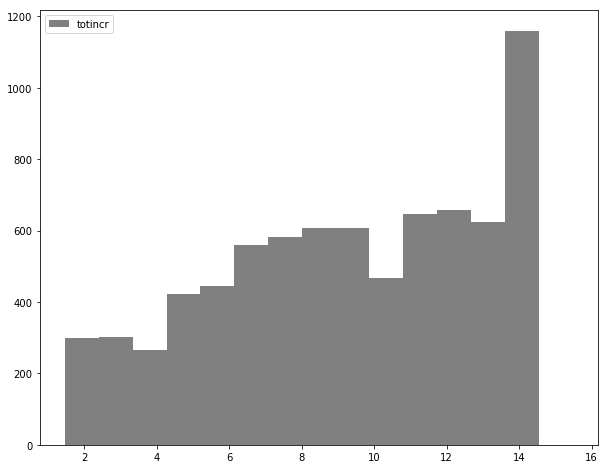

In [23]:
data = resp.totincr # data 변수에 사용할 데이터를 넣어준다. 
plt.subplot(111)  # 1x1x1 plot을 생성한다. 
plt.hist(data, label = 'totincr', color = 'gray', range = [1,15], bins = 15, align = 'right') # hisrogram을 그린다. 값은 1~15, bins은 15개, 
plt.legend() # 범례를 킨다. 
plt.show() # 그래프를 출력한다. 

#### 3번 문제 : 인터뷰 당시 응답자 나이 변수, <tt>age_r</tt>에 대한 히스토그램을 생성하시오.

#### 4번 문제 : 응답자 가구의 가구원수, <tt>numfmhh</tt>에 대한 히스토그램을 생성하시오.

#### 5번 문제 : 응답자 가구의 가구원수, <tt>numfmhh</tt>에 대한 히스토그램을 생성하시오.

#### 6번 문제 : 응답자가 낳은 자녀수, <tt>parity</tt>에 대한 히스토그램을 생성하시오. 이 분포를 어떻게 기술할까요?

In [31]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show()

NameError: name 'thinkstats2' is not defined

#### 6-2번 문제 : Hist.Largest를 사용해서 <tt>parity</tt>의 가장 큰 수를 찾으시오.
→ Histogram을 x축을 기준으로 몇으로 쪼갤 것인지, 쪼개면 그에 해당되는 값의 개수가 나올 것이고, 그 중 가장 큰 수를 찾으라는 문제 <br>

1) 먼저, x의 범위를 확인하자.

In [25]:
print("value range : {} to {}".format(resp.parity.min(), resp.parity.max()))  # 데이터의 min/max를 출력한다. 

value range : 0 to 22


2) 위 그래프에서 봤을 때 x축 크기 1당 개수를 센 값을 histogram으로 나타낸 것으로 볼 수 있다. 크기 1당으로 쪼개려면 어떻게 해야될까?

In [26]:
data_count = {}  # 데이터 담을 바구니 
for i in range(0,23):  # 데이터가 0부터 22까지 있으니까 총 22개
    data_count[i] = sum(resp.parity == i)  # 데이터 별로 몇 개씩 있는 지 확인해서 data_count에 담기. 

In [27]:
data_count

{0: 3230,
 1: 1519,
 2: 1603,
 3: 828,
 4: 309,
 5: 95,
 6: 29,
 7: 15,
 8: 8,
 9: 2,
 10: 3,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 1,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 1}

#### 7번 문제 : <tt>totincr</tt>를 사용해서 가장 높은 임금을 갖는 응답자를 고르시오. 고임금 응답자에 대해서만 <tt>parity</tt> 분포를 계산하시오.

In [30]:
resp.totincr.value_counts() ## 총임금 빈도수 계산
rich = resp[resp.totincr == 14]
hist = thinkstats2.Hist(rich.parity)
thinkplot.Hist(hist, label='rich parity')
thinkplot.Show()

NameError: name 'thinkstats2' is not defined

#### 7-2번 문제 : 고임금과 고임금이 아닌 집단에 대한 평균 <tt>parity</tt>를 비교하시오.

In [29]:
rich = resp[resp.totincr == 14]
poor = resp[resp.totincr < 14]
print('Rich mean value is: ', rich.parity.mean())
print('Poor mean value is: ', poor.parity.mean())

Rich mean value is:  1.0758620689655172
Poor mean value is:  1.2495758136665125
